# Auto Insurance Claims Fruad Prediction

This solution predicts Insurance Claims Fruad based on factors such as policy_report_available, collision_type, witnesses etc. using a trainable ML model. 

## Contents

1. Prequisites
2. Data Dictionary
3. Import Libraries
4. Load Input Data
5. Create Model
6. Predict Test Datapoints
7. Saving Prediction

## Prerequisites

To run this notebook you need to have install following packages:

- `pandas` to read/save csv files.
- `imblearn` to train model on imbalanced data.
- `sklearn` for base estimator.
- `matplotlib`, `seaborn` for plotting.

## Data Dictionary

- The input has to be a '.csv' file with 'utf-8' encoding. 
- PLEASE NOTE: If your input .csv file is not 'utf-8' encoded, model will not perform as expected.
- Required Features: `months_as_customer`, `age`, `policy_state`, `policy_csl`, `policy_deductable`, `policy_annual_premium`, `umbrella_limit`, `insured_zip`, `insured_sex`, `insured_education_level`, `insured_occupation`, `insured_hobbies`, `insured_relationship`, `capital-gains`, `capital-loss`, `incident_type`, `collision_type`, `incident_severity`, `authorities_contacted`, `incident_state`, `incident_city`, `incident_hour_of_the_day`, `number_of_vehicles_involved`, `property_damage`, `bodily_injuries`, `witnesses`, `police_report_available`, `total_claim_amount`, `injury_claim`, `property_claim`, `vehicle_claim`, `auto_make`, `auto_year`, `fraud_reported`, `incident_month`, `incident_day`.

## Importing Libraries

In [2]:
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.ensemble import BalancedBaggingClassifier 
from sklearn.ensemble import RandomForestClassifier 

## Load Input Data

In [3]:
# let's import the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# let's take a look at the data
pd.set_option('display.max_columns', None)
train_df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,incident_month,incident_day
0,222,42,0.770,0.73,500,1124.60,0,612904,0.73,0.76,0.75,0.760,0.74,0,0,0.72,0.78,0.89,0.79,0.77,0.71,23,3,0.74,0,0,0.77,51740,11940,7960,31840,0.84,2006,1,1,30
1,278,47,0.745,0.78,500,1285.01,0,459630,0.73,0.78,0.76,0.805,0.74,0,-39800,0.70,0.78,0.39,0.70,0.76,0.74,21,1,0.76,2,2,0.74,58500,5850,5850,46800,0.81,2010,1,2,2
2,77,27,0.745,0.78,2000,966.26,0,471704,0.76,0.77,0.83,0.730,0.78,56400,-32800,0.72,0.72,0.89,0.70,0.77,0.75,1,3,0.74,0,0,0.77,67200,6720,6720,53760,0.71,1995,1,2,6
3,160,33,0.770,0.78,1000,1422.78,0,616583,0.76,0.77,0.63,0.810,0.79,61600,0,0.72,0.72,0.87,0.70,0.69,0.77,17,3,0.76,2,3,0.74,52800,5280,5280,42240,0.82,2006,1,1,20
4,40,39,0.745,0.78,1000,1248.25,4000000,605692,0.76,0.73,0.72,0.760,0.78,0,-33300,0.90,0.78,0.89,0.79,0.76,0.78,8,1,0.76,0,2,0.77,8760,1460,1460,5840,0.72,2013,1,2,1


In [4]:
# let's split the data into dependent and independent sets

x = train_df.drop(['fraud_reported'], axis = 1)
y = train_df['fraud_reported']

print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (800, 35)
Shape of y : (800,)


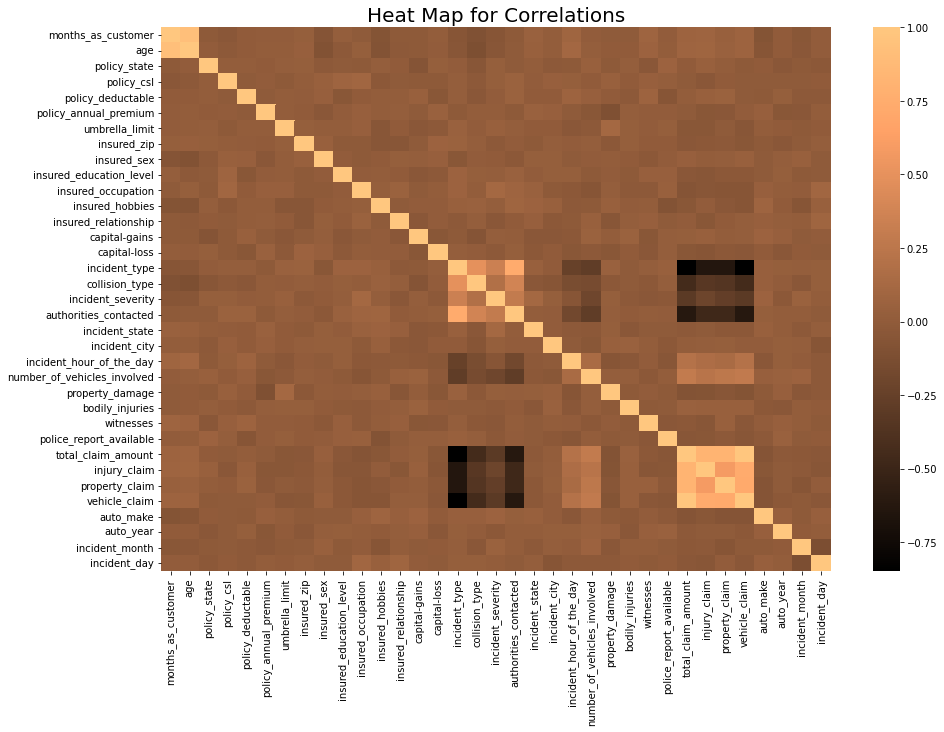

In [5]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(x.corr(), cmap = 'copper')
plt.title('Heat Map for Correlations', fontsize = 20)
plt.show()

## Create Model

**Bagging Classifier**

In [6]:
# Random Forest with Bagging Classifier                 

model = BalancedBaggingClassifier(base_estimator = RandomForestClassifier(),
                                 sampling_strategy = 'auto',
                                 replacement = False,
                                 random_state = 0)

model.fit(x, y)

BalancedBaggingClassifier(base_estimator=RandomForestClassifier(),
                          random_state=0)

## Predict Test Datapoints

In [7]:
predictions = model.predict(test_df)

## Saving Prediction

In [8]:
test_df["fraud_predictions"] = predictions

In [9]:
test_df.to_csv("output.csv", index=None)